In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

In [2]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [3]:
df = pd.read_csv('.//data//msisdn_history.csv' , low_memory=False)
df.columns

Index([u'PHONENUMBER', u'CURRENTOPID', u'NRHOPID', u'STATE', u'CREATEDATE',
       u'LASTUSEDATE', u'TYPE', u'SS7RN', u'SS7DN', u'SMRI', u'MMSRI',
       u'VOIPRI', u'RIUPDATEDATE', u'HISTORYSTATE'],
      dtype='object')

In [4]:
df.head()

,PHONENUMBER,CURRENTOPID,NRHOPID,STATE,CREATEDATE,LASTUSEDATE,TYPE,SS7RN,SS7DN,SMRI,MMSRI,VOIPRI,RIUPDATEDATE,HISTORYSTATE
0,0923966669,17,14,2,20051014 15:44:50,20051014 15:44:50,M,1417.0,NaN,NaN,NaN,NaN,20120926 02:16:07,0
1,0912345789,39,19,2,20051014 16:49:53,20051014 16:49:53,M,1439.0,NaN,NaN,NaN,NaN,20050616 02:00:00,0
2,0988101717,12,39,2,20051014 17:33:05,20051014 17:33:05,M,1412.0,NaN,NaN,NaN,NaN,20130320 02:15:27,0
3,0929926130,19,13,2,20051014 18:03:52,20051014 18:03:52,M,1419.0,NaN,NaN,NaN,NaN,20090512 02:31:28,0
4,0956558410,39,13,2,20051014 18:54:15,20051014 18:54:15,M,1439.0,NaN,NaN,NaN,NaN,20080219 02:37:53,0


In [5]:
#df_fix = df.loc[(df['TYPE'] == 'L') & df['PHONENUMBER'].str.contains('02-')]
df_mobile = df.loc[(df['TYPE'] == 'M')]
mobile_phone = df_mobile[['PHONENUMBER', 'CURRENTOPID', 'NRHOPID', 'STATE' , 'TYPE' , 'SS7RN' , 'SS7DN' , 'RIUPDATEDATE']].sort_values('PHONENUMBER', ascending=False)
len(mobile_phone)

49298800

#各業者在上個月攜碼數量

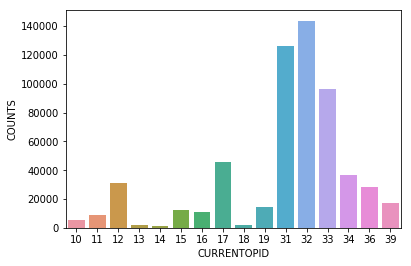

In [6]:
month_df = df.loc[(df['TYPE'] == 'M') & df['RIUPDATEDATE'].str.contains('201710')]
month_mobile_data = month_df[['PHONENUMBER', 'CURRENTOPID', 'NRHOPID', 'STATE' , 'TYPE' , 'SS7RN' , 'SS7DN' , 'RIUPDATEDATE']].sort_values('PHONENUMBER', ascending=False)
len(month_mobile_data)
#value_counts是將CURRENTOPID COUNT後的結果
pre_month_df = pd.DataFrame(month_df['CURRENTOPID'].value_counts()).reset_index()
pre_month_df.columns = ['CURRENTOPID' , 'COUNTS']
sns.barplot(x='CURRENTOPID' , y='COUNTS' , data=pre_month_df)

#10月份同門號攜碼超過1次

In [7]:
over_1np_phone_df = month_df.groupby(df['PHONENUMBER'])
print type(over_1np_phone_df)
over_1np_phone_count = over_1np_phone_df.size()
len(over_1np_phone_count[over_1np_phone_count >1])

<class 'pandas.core.groupby.DataFrameGroupBy'>


48932

#同集團2G原獲核配轉3G

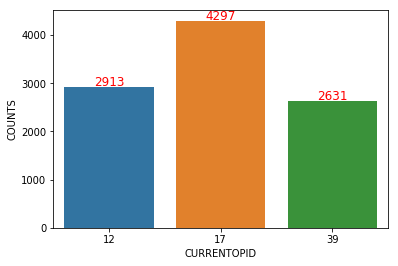

In [8]:
sameGroup2GTo3Gdf = month_df.loc[((df['NRHOPID'] == 19) & (df['CURRENTOPID'] == 39)) | ((df['NRHOPID'] == 11) & (df['CURRENTOPID'] == 12)) | (((df['NRHOPID'] == 10) | (df['NRHOPID'] == 16)) & (df['CURRENTOPID'] == 17)) ]
sameGroup2GTo3GData = sameGroup2GTo3Gdf[['PHONENUMBER', 'CURRENTOPID', 'NRHOPID', 'STATE' , 'TYPE' , 'SS7RN' , 'SS7DN' , 'RIUPDATEDATE']].sort_values('PHONENUMBER', ascending=False)
len(sameGroup2GTo3GData)
sameGroup2GTo3GData_df = pd.DataFrame(sameGroup2GTo3GData['CURRENTOPID'].value_counts()).reset_index()
sameGroup2GTo3GData_df.columns = ['CURRENTOPID' , 'COUNTS']
ax = sns.barplot(x='CURRENTOPID' , y='COUNTS' , data=sameGroup2GTo3GData_df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()-0.01*(p.get_height()), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#同集團2G原獲核配轉4G

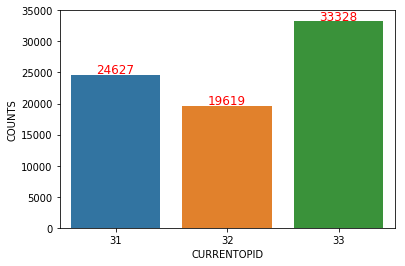

In [9]:
sameGroup2GTo4Gdf = month_df.loc[((df['NRHOPID'] == 19) & (df['CURRENTOPID'] == 33)) | ((df['NRHOPID'] == 11) & (df['CURRENTOPID'] == 31)) | (((df['NRHOPID'] == 10) | (df['NRHOPID'] == 16)) & (df['CURRENTOPID'] == 32)) ]
sameGroup2GTo4GData = sameGroup2GTo4Gdf[['PHONENUMBER', 'CURRENTOPID', 'NRHOPID', 'STATE' , 'TYPE' , 'SS7RN' , 'SS7DN' , 'RIUPDATEDATE']].sort_values('PHONENUMBER', ascending=False)
len(sameGroup2GTo4GData)
sameGroup2GTo4GData_df = pd.DataFrame(sameGroup2GTo4GData['CURRENTOPID'].value_counts()).reset_index()
sameGroup2GTo4GData_df.columns = ['CURRENTOPID' , 'COUNTS']
ax = sns.barplot(x='CURRENTOPID' , y='COUNTS' , data=sameGroup2GTo4GData_df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()-0.01*(p.get_height()), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

#同集團3G原獲核配轉4G

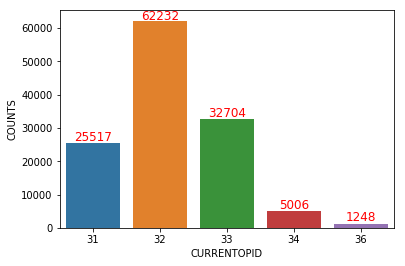

In [10]:
sameGroup3GTo4Gdf = month_df.loc[((df['NRHOPID'] == 39) & (df['CURRENTOPID'] == 33)) | ((df['NRHOPID'] == 12) & (df['CURRENTOPID'] == 31)) | ((df['NRHOPID'] == 17) & (df['CURRENTOPID'] == 32)) |((df['NRHOPID'] == 15) & (df['CURRENTOPID'] == 36)) |((df['NRHOPID'] == 18) & (df['CURRENTOPID'] == 34))]
sameGroup3GTo4GData = sameGroup3GTo4Gdf[['PHONENUMBER', 'CURRENTOPID', 'NRHOPID', 'STATE' , 'TYPE' , 'SS7RN' , 'SS7DN' , 'RIUPDATEDATE']].sort_values('PHONENUMBER', ascending=False)
len(sameGroup3GTo4GData)
sameGroup3GTo4GData_df = pd.DataFrame(sameGroup3GTo4GData['CURRENTOPID'].value_counts()).reset_index()
sameGroup3GTo4GData_df.columns = ['CURRENTOPID' , 'COUNTS']
ax = sns.barplot(x='CURRENTOPID' , y='COUNTS' , data=sameGroup3GTo4GData_df)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()-0.01*(p.get_height()), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')

In [11]:
def get_stats(group):
    return {'min': group.min(), 'max': group.max(), 'count': group.count(), 'mean': group.mean()}

#10月份攜碼超過1筆的門號數量

In [21]:
month_01_df = df.loc[(df['TYPE'] == 'M') & df['RIUPDATEDATE'].str.contains('201701')]
over_1np_01_phone_df = month_01_df.groupby(df['PHONENUMBER'])
over_1np_01_phone_count = over_1np_01_phone_df.size()
len(over_1np_01_phone_count[over_1np_01_phone_count >1])

75094

#今年每個月攜碼超過1筆的門號數量

In [14]:
countlist = []
def getYearDataCount(df,year):
    for i in range(1,13):
        month_df = df.loc[(df['TYPE'] == 'M') & (df['RIUPDATEDATE'].str.contains(str(year) + ('0'+ str(i) if i < 10 else str(i))))]
        phone_count = month_df.groupby(df['PHONENUMBER']).size()
        countlist.append(len(phone_count[phone_count>1]))

getYearDataCount(df,2017)
print countlist

[75094, 92680, 74861, 54185, 46504, 46044, 49021, 51713, 47069, 48932, 18547, 0]


Text(0.5,0.98,u'2017\u5e74\u6bcf\u500b\u6708\u540c\u9580\u865f\u651c\u78bc\u5169\u6b21\u4ee5\u4e0a\u7684\u6578\u91cf')

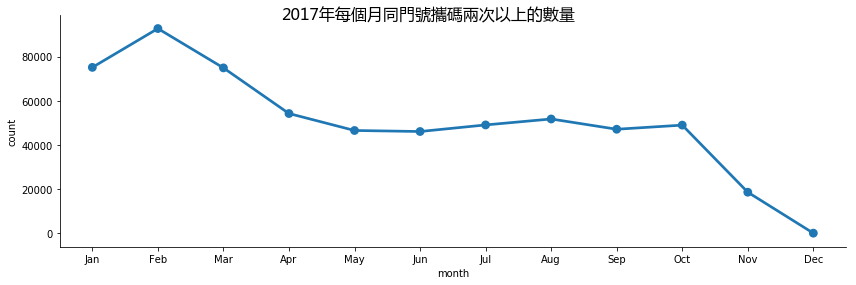

In [15]:
data_df = pd.DataFrame(
    {"month": month_order,
     "count": countlist
    }
)
sns.factorplot(data = data_df, x="month", y="count", ci = None , size=4 , aspect=3).fig.suptitle(u'2017年每個月同門號攜碼兩次以上的數量',family='Microsoft YaHei', size=16)

In [ ]:
for i in range(1,13):
    print str(2017) + ('0'+ str(i) if i < 10 else str(i))

#今年每個月攜碼超過1筆的門號數量

In [16]:
# encoding=UTF-8
countTuplelist = []
def getYearDataCountTuple(df,year):
    for i in range(1,13):
        month_df = df.loc[(df['TYPE'] == 'M') & (df['RIUPDATEDATE'].str.contains(str(year) + ('0'+ str(i) if i < 10 else str(i))))]
        phone_count = month_df.groupby(df['PHONENUMBER']).size()
        countTuplelist.append((i,len(phone_count[phone_count>1])))

getYearDataCountTuple(df,2017)
print countTuplelist

[(1, 75094), (2, 92680), (3, 74861), (4, 54185), (5, 46504), (6, 46044), (7, 49021), (8, 51713), (9, 47069), (10, 48932), (11, 18547), (12, 0)]


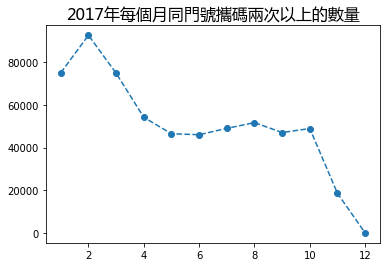

In [17]:
def plotData(plt, data):
  x = [p[0] for p in data]
  y = [p[1] for p in data]
  plt.plot(x, y, '--o')

plt.title(u"2017年每個月同門號攜碼兩次以上的數量",family='Microsoft YaHei', size=16)

plotData(plt, countTuplelist)
plt.show()

In [98]:
eachMonthList = []
def getYearNpDataCount(df,year):
    for i in range(1,13):
        each_month_np_count = df.groupby((df['TYPE'] == 'M') & (df['RIUPDATEDATE'].str.contains(str(year) + ('0'+ str(i) if i < 10 else str(i))))).size()
        print each_month_np_count
        try:
            eachMonthList.append(each_month_np_count[1])
        except:
            eachMonthList.append(0)

getYearNpDataCount(df,2017)
print eachMonthList

False    48644057
True       700172
dtype: int64
False    48671413
True       672816
dtype: int64
False    48669939
True       674290
dtype: int64
False    48773010
True       571219
dtype: int64
False    48696902
True       647327
dtype: int64
False    48598114
True       746115
dtype: int64
False    48681963
True       662266
dtype: int64
False    48726985
True       617244
dtype: int64
False    48755828
True       588401
dtype: int64
False    48762060
True       582169
dtype: int64
False    48945211
True       399018
dtype: int64
False    49344229
dtype: int64
[700172, 672816, 674290, 571219, 647327, 746115, 662266, 617244, 588401, 582169, 399018, 0]


Text(0.5,0.98,u'2017\u5e74\u6bcf\u500b\u6708\u884c\u7db2\u651c\u78bc\u6578\u91cf')

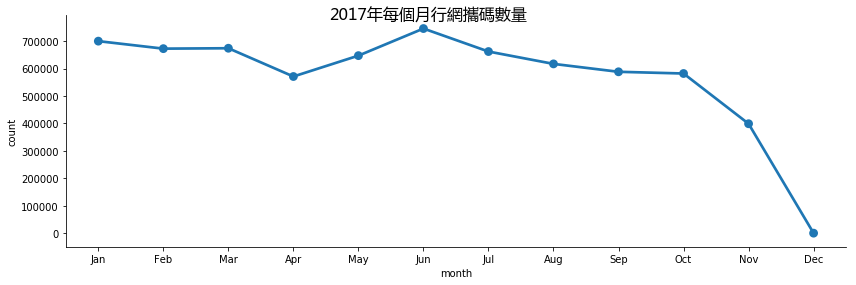

In [130]:
each_month_count_df = pd.DataFrame(
    {
     "month": month_order,
#      "month": range(1,13),
     "count": eachMonthList
    }
)

sns.factorplot(data = each_month_count_df, x="month", y="count", ci = None , size=4 , aspect=3).fig.suptitle(u'2017年每個月行網攜碼數量',family='Microsoft YaHei', size=16)

In [23]:
each_carrier_01_df = month_01_df.groupby(df['CURRENTOPID'])
each_carrier_count = each_carrier_01_df.size()
each_carrier_count

CURRENTOPID
10      7803
11      9027
12     49108
13      1701
14       698
15     25713
16     14284
17     52923
18      2514
19     12933
31    110660
32    128697
33    157670
34     47935
36     30719
39     47787
dtype: int64

In [62]:
year_2017_df = df.loc[(df['TYPE'] == 'M') & df['RIUPDATEDATE'].str.contains('2017')]

In [63]:
year_2017_df.head()

,PHONENUMBER,CURRENTOPID,NRHOPID,STATE,CREATEDATE,LASTUSEDATE,TYPE,SS7RN,SS7DN,SMRI,MMSRI,VOIPRI,RIUPDATEDATE,HISTORYSTATE
42467270,0919550760,39,19,2,20100122 15:57:50,20100122 15:57:50,M,1439.0,NaN,NaN,NaN,NaN,20170101 02:00:02,0
42467271,0927027880,39,10,2,20111128 19:24:37,20111128 19:24:37,M,1439.0,NaN,NaN,NaN,NaN,20170101 02:00:02,0
42467272,0936268836,39,16,2,20060123 22:42:49,20060123 22:42:49,M,1439.0,NaN,NaN,NaN,NaN,20170101 02:00:02,0
42467273,0918915628,33,11,2,20110425 21:38:39,20110425 21:38:39,M,1433.0,NaN,NaN,NaN,NaN,20170101 02:00:02,0
42467274,0919083288,39,19,2,20130721 19:28:20,20130721 19:28:20,M,1439.0,NaN,NaN,NaN,NaN,20170101 02:00:02,0


In [72]:
year_2017_df = year_2017_df[['CURRENTOPID' , 'RIUPDATEDATE']]
year_data_2017_df = year_2017_df
year_data_2017_df['RIUPDATEDATE'] = year_data_2017_df['RIUPDATEDATE'].apply(lambda x: x[:6])
year_data_2017_df

,CURRENTOPID,RIUPDATEDATE
42467270,39,201701
42467271,39,201701
42467272,39,201701
42467273,33,201701
42467274,39,201701
42467275,39,201701
42467276,33,201701
42467277,39,201701
42467278,33,201701
42467279,33,201701


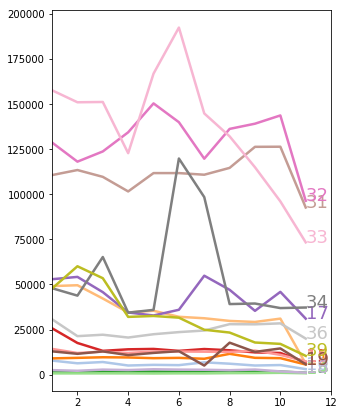

In [180]:
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e', '#ffbb78', '#2ca02c',
                  '#98df8a', '#d62728', '#ff9896', '#9467bd', '#c5b0d5',
                  '#8c564b', '#c49c94', '#e377c2', '#f7b6d2', '#7f7f7f',
                  '#c7c7c7', '#bcbd22', '#dbdb8d', '#17becf', '#9edae5']
majers = ['10']
eachCarrierMonthList = []
def each_month_carrier_np_count(year):
    count = 1
    fig, ax = plt.subplots(1, 1, figsize=(5, 7))
    ax.set_xlim(1, 12)
    carrier_month_np_count = []
    each_month_carrier_np_count = year_data_2017_df.groupby(['CURRENTOPID' , 'RIUPDATEDATE']).size()
    print each_month_carrier_np_count.items()
    for m,v in each_month_carrier_np_count.items():
        carrier_month_np_count.append(v)
#         print count%11 == 0 , count , carrier_month_np_count
        if count%11 == 0:
            data = carrier_month_np_count
            line = plt.plot(range(1,12),
                            data,
                            lw=2.5,
                            color=color_sequence[count/11])
            
            plt.text(11, v, m[0], fontsize=18, color=color_sequence[count/11])
            carrier_month_np_count = []
        count += 1
    plt.show()
#     try:
#         eachCarrierMonthList.append(each_month_carrier_np_count[1])
#     except:
#         eachCarrierMonthList.append(0)

each_month_carrier_np_count(2017)

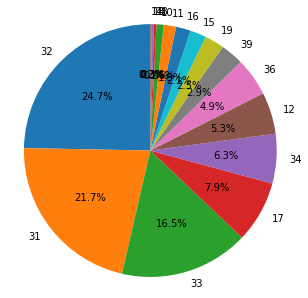

In [182]:
from pylab import *
labels = []
sizes = []
for label in pre_month_df['CURRENTOPID']:
    labels.append(label)
for size in pre_month_df['COUNTS']:
    sizes.append(size)

figure(1, figsize=(5,5))
ax1 = plt.subplot(aspect=1)
# fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

savefig('sample.pdf')
plt.show()

In [149]:
pre_month_df

,CURRENTOPID,COUNTS
0,32,143732
1,31,126388
2,33,96086
3,17,45909
4,34,36920
5,12,31069
6,36,28446
7,39,17064
8,19,14540
9,15,12027
